<a href="https://colab.research.google.com/github/Wapikkk/BDC-Satria-Data/blob/main/BDC_dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import gdown

file_id = "1dw7ExRdYbqLSm-DArJDq-Ebi-36Relwv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "Dataset.csv", quiet=False)

df = pd.read_csv("Dataset.csv", encoding="ISO-8859-1")

columns_to_drop = ["Customer Email", "Customer Password", "Product Description", "Product Image"]
df.drop(columns=columns_to_drop, inplace=True)

df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"], errors='coerce')
df["shipping date (DateOrders)"] = pd.to_datetime(df["shipping date (DateOrders)"], errors='coerce')

df["actual_shipping_days"] = (df["shipping date (DateOrders)"] - df["order date (DateOrders)"]).dt.days

df.head(15)

Downloading...
From: https://drive.google.com/uc?id=1dw7ExRdYbqLSm-DArJDq-Ebi-36Relwv
To: /content/Dataset.csv
100%|██████████| 95.9M/95.9M [00:02<00:00, 43.2MB/s]


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,actual_shipping_days
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,3
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,PENDING,NaN,1360,73,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,5
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,CLOSED,NaN,1360,73,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class,4
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class,3
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,PENDING_PAYMENT,NaN,1360,73,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class,2
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,CANCELED,NaN,1360,73,Smart watch,327.75,0,2018-01-19 11:03:00,Standard Class,6
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2018-01-15 10:42:00,First Class,2
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,PROCESSING,NaN,1360,73,Smart watch,327.75,0,2018-01-15 10:21:00,First Class,2
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,CLOSED,NaN,1360,73,Smart watch,327.75,0,2018-01-16 10:00:00,Second Class,3
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,CLOSED,NaN,1360,73,Smart watch,327.75,0,2018-01-15 09:39:00,First Class,2


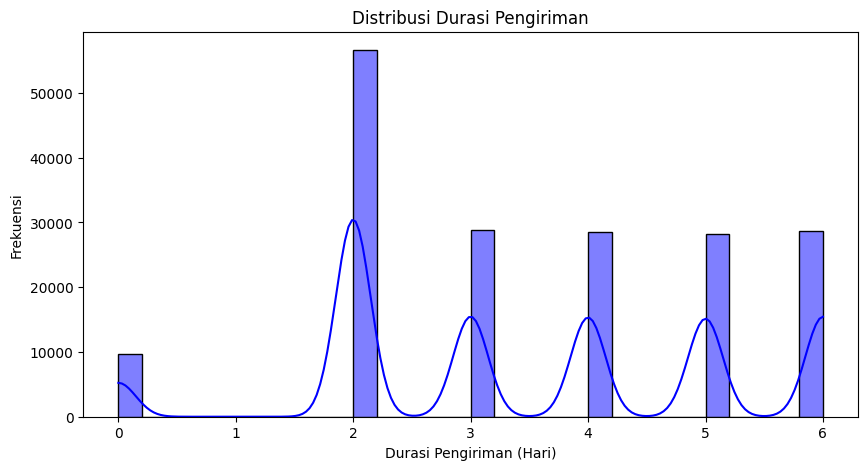

<ipython-input-2-7445e5689448>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Late_delivery_risk", data=df, palette="coolwarm")


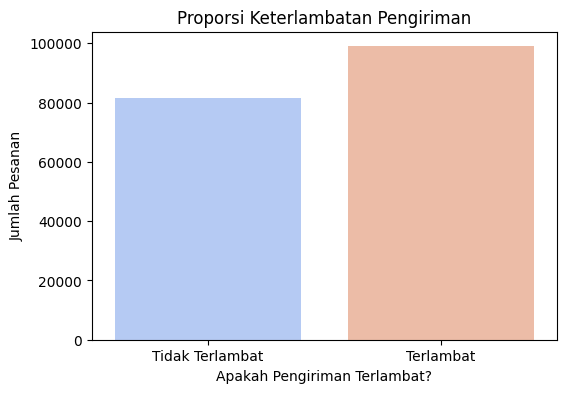

<ipython-input-2-7445e5689448>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Shipping Mode", y="actual_shipping_days", data=df, palette="Set2")


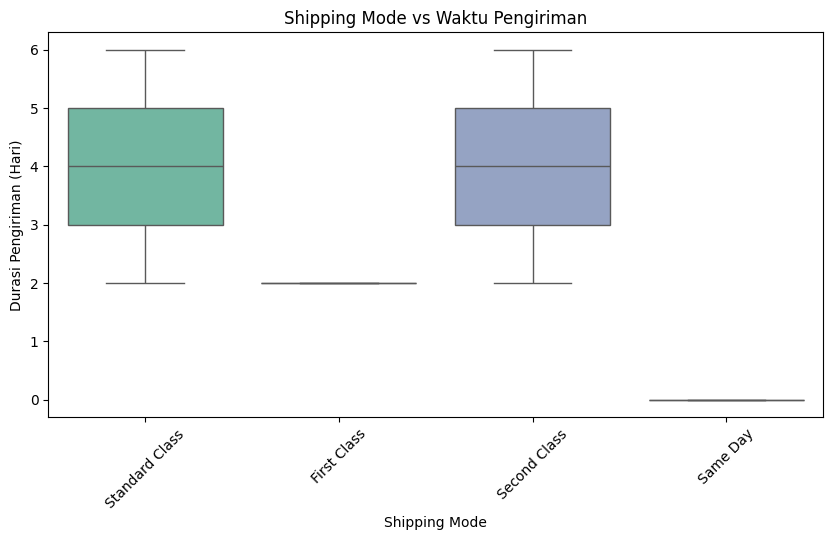

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df["actual_shipping_days"], bins=30, kde=True, color="blue")
plt.xlabel("Durasi Pengiriman (Hari)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Durasi Pengiriman")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="Late_delivery_risk", data=df, palette="coolwarm")
plt.xlabel("Apakah Pengiriman Terlambat?")
plt.ylabel("Jumlah Pesanan")
plt.xticks(ticks=[0, 1], labels=["Tidak Terlambat", "Terlambat"])
plt.title("Proporsi Keterlambatan Pengiriman")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Shipping Mode", y="actual_shipping_days", data=df, palette="Set2")
plt.xlabel("Shipping Mode")
plt.ylabel("Durasi Pengiriman (Hari)")
plt.title("Shipping Mode vs Waktu Pengiriman")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

selected_features = [
    "Days for shipment (scheduled)", "Shipping Mode", "Order Region", "Order State",
    "Sales per customer", "Order Item Quantity"
]
target = "actual_shipping_days"

categorical_features = ["Shipping Mode", "Order Region", "Order State"]
numerical_features = ["Days for shipment (scheduled)", "Sales per customer", "Order Item Quantity"]

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_features])

X = np.hstack((df[numerical_features].values, encoded_categorical))
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")


Jumlah data training: 144415
Jumlah data testing: 36104


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
import numpy as np

X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest (Optimized)": RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=30, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_sample, y_train_sample)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

for model, metrics in results.items():
    print(f"\nModel: {model}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}")
    print(f"R2 Score: {metrics['R2 Score']:.4f}")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1101
[LightGBM] [Info] Number of data points in the train set: 43324, number of used features: 421
[LightGBM] [Info] Start training from score 3.477357

Model: Linear Regression
Mean Absolute Error (MAE): 0.99
Root Mean Squared Error (RMSE): 1.27
R2 Score: 0.4251

Model: Random Forest (Optimized)
Mean Absolute Error (MAE): 1.04
Root Mean Squared Error (RMSE): 1.39
R2 Score: 0.3115

Model: LightGBM
Mean Absolute Error (MAE): 0.98
Root Mean Squared Error (RMSE): 1.26
R2 Score: 0.4307


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

lgb_model = lgb.LGBMRegressor(random_state=42)

grid_search = GridSearchCV(lgb_model, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_lgb = grid_search.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 144415, number of used features: 710
[LightGBM] [Info] Start training from score 3.471869
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

<ipython-input-10-e374069d25a0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="Blues_r")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


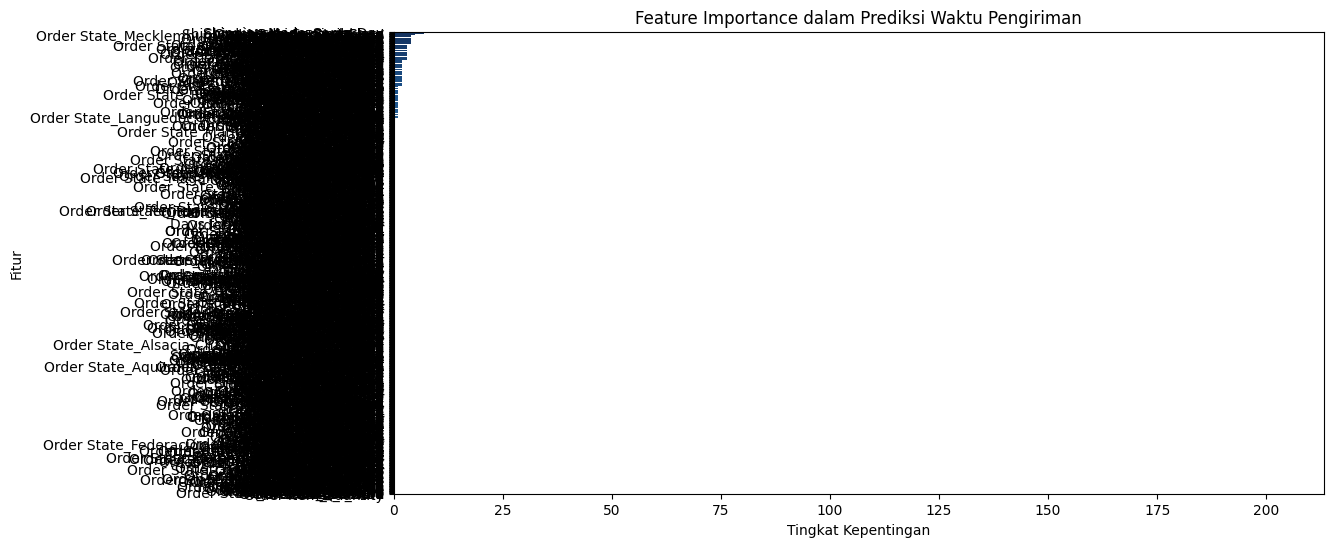

In [ ]:
importance = best_lgb.feature_importances_
feature_names = encoder.get_feature_names_out(categorical_features).tolist() + numerical_features

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="Blues_r")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.title("Feature Importance dalam Prediksi Waktu Pengiriman")
plt.show()

In [ ]:
new_data = pd.DataFrame({
    "Days for shipment (scheduled)": [5],
    "Shipping Mode": ["Standard Class"],
    "Order Region": ["US East"],
    "Order State": ["New York"],
    "Sales per customer": [500],
    "Order Item Quantity": [2]
})

new_data_encoded = encoder.transform(new_data[categorical_features])
new_data_final = np.hstack((new_data[numerical_features].values, new_data_encoded))

predicted_days = best_lgb.predict(new_data_final)
print("Prediksi Waktu Pengiriman:", round(predicted_days[0]), "hari")

Prediksi Waktu Pengiriman: 4 hari


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
